This notebook contains all essentails statistic topics discussed on our Intro to Data Science Course. Note that many of these concepts are extensive, so to fully understand them you need to spend time on them yourself.

#TODO

- krotkie wprowadzenie
- zmienne losowe
- rozklady
- wartosc oczekiwana odchylenie 
- istotnosc, srednia, przedzialy ufnosci
- kowariancja, korelacja
- jak interpretowac korelacje
- Probkowanie
- Testy statystyczne

# Quick introduction

Statistics is the disciplin that concerns the collection, organization, analysis, interpretation, and presentation of data.

On previous lessons, we talked about organization and presentation of data. Now, it is time to discuss interpretation and analysis in slightly more technical way.

# Random Variables

##### Definition
Formally, random variable $X$ is a measurable function $X:\Omega \rightarrow \R$. If you want to know more about measurability: https://en.wikipedia.org/wiki/Measurable_function. 
But let's leave the theories alone.

A random variable is a numerical outcome of random phenomenon.

A random variable is typically denoted by a capital letter such as $X$, $Y$ or $Z$. The values that a random variable can assume are denoted by lowercase letters like $x$, $y$, $z$. Random variable can be discrete or continuous.

- Discrete - the values ​​of the random variable X are points.
- Continuous - when the values ​​of the random variable contains all points of the segment (cover the range of real numbers)

##### Distribution
The distribution of a random variable (probability distribution for discrete variables) is the set of pairs $(x_i, p_i)$ where $x_i$ is the value of the random variable $X$ and $p_i$ is the probability that the random variable $X$ takes the value $x_i$.

##### Cumulative distribution function
The cumulative distribution function (CDF) $F(x)$ is the probability that the random variable $X$ will take a value less than $x$ (at most a given value).

##### Examples of Distributions

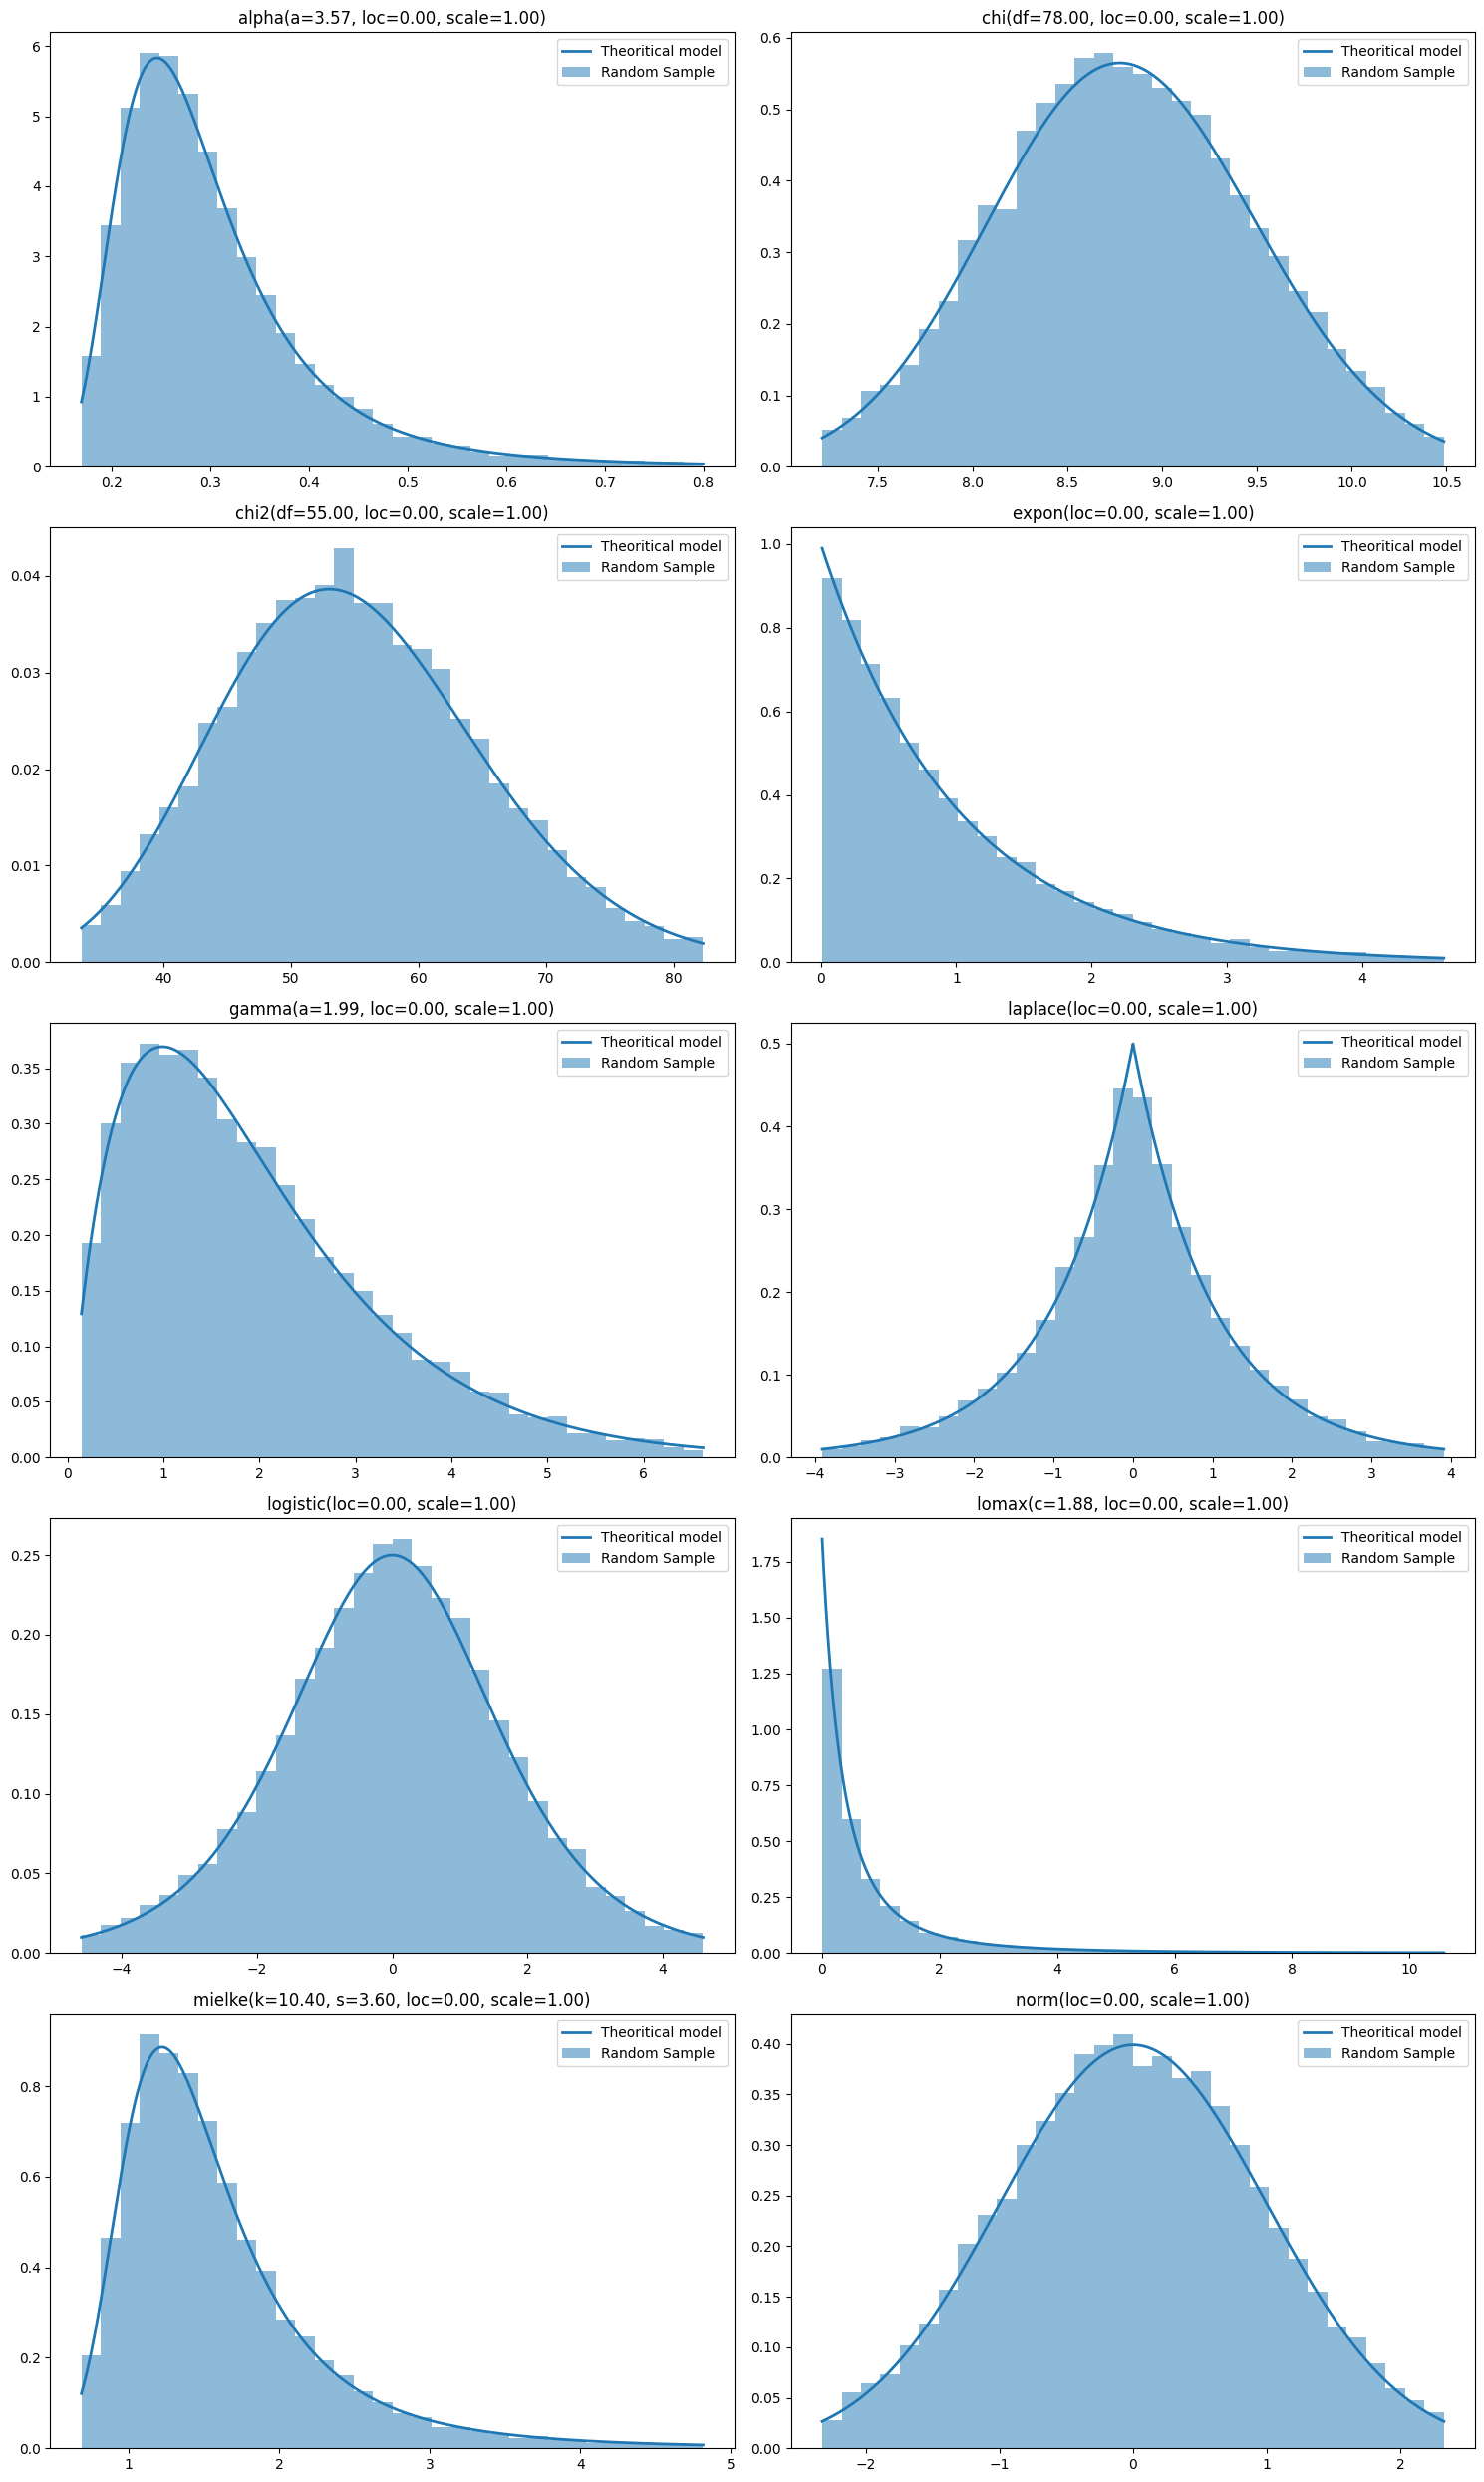

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Lista dystrybucji do przetestowania
DISTRIBUTIONS = [
    stats.alpha(a=3.57, loc=0.0, scale=1.0),
    stats.chi(df=78, loc=0.0, scale=1.0),
    stats.chi2(df=55, loc=0.0, scale=1.0),
    stats.expon(loc=0.0, scale=1.0),
    stats.gamma(a=1.99, loc=0.0, scale=1.0),
    stats.laplace(loc=0.0, scale=1.0),
    stats.logistic(loc=0.0, scale=1.0),
    stats.lomax(c=1.88, loc=0.0, scale=1.0),
    stats.mielke(k=10.4, s=3.6, loc=0.0, scale=1.0),
    stats.norm(loc=0.0, scale=1.0),
]

bins = 32
size = 16384
plotData = []

# Tworzenie danych i wykresów
for distribution in DISTRIBUTIONS:
    try:
        # Generowanie losowych danych
        rv = pd.Series(distribution.rvs(size=size))
        # Wyznaczenie zakresu dystrybucji
        start = distribution.ppf(0.01)
        end = distribution.ppf(0.99)

        # Budowa PDF i konwersja do Series pandas
        x = np.linspace(start, end, size)
        y = distribution.pdf(x)
        pdf = pd.Series(y, x)

        # Tworzenie histogramu z losowych danych
        b = np.linspace(start, end, bins+1)
        y, x = np.histogram(rv, bins=b, density=True)  # density zamiast normed
        x = [(a+x[i+1])/2.0 for i, a in enumerate(x[0:-1])]
        hist = pd.Series(y, x)

        # Tworzenie nazwy dystrybucji i parametrów
        title = '{}({})'.format(distribution.dist.name, ', '.join(
            ['{}={:0.2f}'.format(k, v) for k, v in distribution.kwds.items()]))

        # Przechowywanie danych do późniejszego użytku
        plotData.append({
            'pdf': pdf,
            'hist': hist,
            'title': title
        })

    except Exception as e:
        print(f'could not create data for {distribution.dist.name}: {e}')

# Wyświetlanie wykresów w jednym dużym subplotcie
n_plots = len(plotData)
n_cols = 2
n_rows = (n_plots + 1) // n_cols  # Obliczanie ilości rzędów
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

for i, data in enumerate(plotData):
    ax = axes[i // n_cols, i % n_cols]
    w = abs(abs(data['hist'].index[0]) - abs(data['hist'].index[1]))

    # Tworzenie wykresu na odpowiednim subplocie
    data['pdf'].plot(kind='line', label='Theoritical model', legend=True, lw=2, ax=ax)
    ax.bar(data['hist'].index, data['hist'].values,
           label='Random Sample', width=w, align='center', alpha=0.5)
    ax.set_title(data['title'])
    ax.legend()

# Usuwanie pustych subplots jeśli istnieją
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

##### Expected value
Symbolized as E(X), is often referred to as the long-term average. This means that over the long term of doing an experiment over and over, you would expect this average.
$$E(X)=\sum xP(X)$$

Knowing values and it's probabilities, we can calculate expected value

In [12]:
values = [0, 1, 2, 3, 4]
probs = [.1, .2, .3, .4, .5]

def expectedValue(values, weights):
    values = np.asarray(values)
    weights = np.asarray(weights)
    return np.sum(values * weights)

expectedValue(values, probs)

4.0

##### Standart deviation

The standard deviation is a measure of the amount of variation or dispersion in a set of data values. It tells you how spread out the values in a dataset are around the mean (average) value.

Low Standard Deviation: Indicates that the data points tend to be very close to the mean.
High Standard Deviation: Indicates that the data points are spread out over a large range of values.

For discrete values:
$$\sigma ={\sqrt {{\frac {1}{N}}\sum _{i=1}^{N}(x_{i}-\mu )^{2}}},{\text{ where }}\mu ={\frac {1}{N}}\sum _{i=1}^{N}x_{i}$$

For continous values:
$$\sigma ={\sqrt {\int _{\mathbf {X} }(x-\mu )^{2}\,p(x)\,\mathrm {d} x}},{\text{ where }}\mu =\int _{\mathbf {X} }x\,p(x)\,\mathrm {d} x$$

But in Python, we can do this easily with NumPy:

In [11]:
standardDeviation = np.std(values)
standardDeviation

1.4142135623730951

##### Covariance

##### Correlation and how to interpret it

##### Sampling